In [ ]:
import pandas as pd 
import numpy as np 
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
import seaborn as sns
from IPython import display 
from pprint import pprint 
import math
import matplotlib.pyplot as plt
import praw

In [ ]:
nltk.download('vader_lexicon')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\kaur2\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kaur2\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kaur2\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\kaur2\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
import requests

# note that CLIENT_ID refers to 'personal use script' and SECRET_TOKEN to 'secret'
auth = requests.auth.HTTPBasicAuth('rS3h91UAR6DW_w', 'j-cR24abNjseKxGiG8zdG0tHNnOOjA')

# here we pass our login method (password), username, and password
data = {'grant_type': 'password',
        'username': 'Ginni1992',
        'password': 'Superhero'}

# setup our header info, which gives reddit a brief description of our app
headers = {'User-Agent': 'Mycode/0.01'}

# send our request for an OAuth token
res = requests.post('https://www.reddit.com/api/v1/access_token',
                    auth=auth, data=data, headers=headers)

# convert response to JSON and pull access_token value
TOKEN = res.json()['access_token']

# add authorization to our headers dictionary
headers = {**headers, **{'Authorization': f"bearer {TOKEN}"}}

# while the token is valid (~2 hours) we just add headers=headers to our requests
requests.get('https://oauth.reddit.com/api/v1/me', headers=headers)

<Response [200]>

sns.set(style = 'darkgrid', context = 'talk', palette = 'Dark2')
reddit = praw.Reddit(client_id = 'rS3h91UAR6DW_w',
                    client_secret = 'j-cR24abNjseKxGiG8zdG0tHNnOOjA',
                    user_agent = 'Mycode/0.01')

## Making Requests

In [ ]:
# hot means popular posts 
res = requests.get("https://oauth.reddit.com/r/marvelstudios/hot",
                   headers=headers)

print(res.json())  # let's see what we get


{'kind': 'Listing', 'data': {'modhash': None, 'dist': 27, 'children': [{'kind': 't3', 'data': {'approved_at_utc': None, 'subreddit': 'marvelstudios', 'selftext': 'This thread is for discussion about the episode.\n\n#Insight will be on for the next 24 hours!\nWe will also be removing any threads posted within these 24 hours to prevent unmarked spoilers to go up onto the sub\n\n**Discussion about previous episodes is permitted, discussion about episodes after this is NOT.**\n\n**Proceed at your own risk:**\nSpoilers for this episode do not need to be tagged inside this thread.\n\n---\n\n|EPISODE|DIRECTED BY|WRITTEN BY|ORIGINAL RELEASE DATE|\n|:-----------|:------------:|:------------:|:------------:|\n|S01E06|Kari Skogland|TBA|April 23, 2021 on Disney+\n\n---\n\nFor more in-depth discussion about Marvel shows on Disney+, visit /r/MarvelStudiosPlus', 'author_fullname': 't2_8prka', 'saved': False, 'mod_reason_title': None, 'gilded': 0, 'clicked': False, 'title': 'The Falcon and the Winter 

## Reading the Data

In [ ]:
for post in res.json()['data']['children']:
                     print(post['data']['title'])

The Falcon and the Winter Soldier S01E06 - Discussion Thread
The Falcon and the Winter Soldier - Season Wide Discussion Thread
Dreams do come true
'Captain America 4' in the Works With 'Falcon and the Winter Soldier' Showrunner Malcolm Spellman
"No caption needed." - Sebastian Stan
I think we can all agree what the show should have been called
Karli Morgenthau and the flag smashers are pretty bad villains.
I had to fix the John Walker "Cap is Back" poster for the REAL Captain America!
Suit is ripped straight from the comics. And looks awesome!
A man who knows a thing or two about Holiday Specials has concerns
Hopefully Zemo makes music as well as he dances to it.
Labra-Thor, or Why do my stupid humans have to be theatre people
John Walker: a military Easter Egg and a question left unanswered.
Episode 6 - I Screen Shot this of the Plaque As It goes too fast in the Show.. for those who are interested in reading what it had to say
Captain America by CAFU
Steve Rogers and Sam Wilson's suit

In [ ]:
movies = set()
for sub in reddit.subreddit('marvelstudios').hot(limit = None):
    movies.add(sub.title)
print(len(movies))

944


In [ ]:
# text extracted from posts as positive, neg or neutral using lexicon
# we have used polarity score method to get the sentiments, then append sentiment dict to a result list which will be transformed to a df
sia = SIA() 
results = []
for line in movies:
    scores = sia.polarity_scores(line)
    scores['Posts_Title']= line
    results.append(scores)
df = pd.DataFrame.from_records(results)
df
    

,neg,neu,pos,compound,Posts_Title
0,0.403,0.597,0.000,-0.4019,Adam Driver as Dr Doom?
1,0.000,1.000,0.000,0.0000,Sebastian Stan 9 movie deal with marvel...
2,0.237,0.763,0.000,-0.4199,That makes you...the Scarlet Witch! (Art by bi...
3,0.000,0.741,0.259,0.4215,Introducing Marvel Studios' Spider-Man: A New ...
4,0.000,1.000,0.000,0.0000,WandaVision ep 8/9
...,...,...,...,...,...
940,0.000,1.000,0.000,0.0000,Which Loki are we following in the new series?
941,0.000,0.733,0.267,0.8439,Dave Bautista praises Disney for rehiring Jame...
942,0.000,1.000,0.000,0.0000,Finally was able to frame this piece of art
943,0.216,0.784,0.000,-0.2960,Could Evans secret return be for No Way Home?


- Compound scores the sentiment that runs from -1 (extremely negative) and +1 (extremly positive)
- 3 scores represent the scores of the headline as +,- and neutral

In [ ]:
# label our data: >0.1 as '+' and -0.1 as '-'
df['label'] = 0
df.loc[df['compound'] > 0.1, 'label'] = 1
df.loc[df['compound'] < -0.1, 'label'] = -1
df

,neg,neu,pos,compound,Posts_Title,label
0,0.403,0.597,0.000,-0.4019,Adam Driver as Dr Doom?,-1
1,0.000,1.000,0.000,0.0000,Sebastian Stan 9 movie deal with marvel...,0
2,0.237,0.763,0.000,-0.4199,That makes you...the Scarlet Witch! (Art by bi...,-1
3,0.000,0.741,0.259,0.4215,Introducing Marvel Studios' Spider-Man: A New ...,1
4,0.000,1.000,0.000,0.0000,WandaVision ep 8/9,0
...,...,...,...,...,...,...
940,0.000,1.000,0.000,0.0000,Which Loki are we following in the new series?,0
941,0.000,0.733,0.267,0.8439,Dave Bautista praises Disney for rehiring Jame...,1
942,0.000,1.000,0.000,0.0000,Finally was able to frame this piece of art,0
943,0.216,0.784,0.000,-0.2960,Could Evans secret return be for No Way Home?,-1


In [ ]:
# statistical anlysis: positive comments are labeled by +1 and neg by -1 
print('positive title:\n')
pprint(list(df[df['label'] == 1].Posts_Title)[:5], width = 100 )

print('\nnegative title:\n')
pprint(list(df[df['label'] == -1].Posts_Title)[:5], width = 100 )

positive title:

["Introducing Marvel Studios' Spider-Man: A New Home Starring Miles Morales",
 'How Cap could restore the shield on his return journey.',
 'Alright so it’s a spoiler but it’s also not cause it’s fan creations right?!?!(also it’s been '
 'over 2 weeks now). Anyway, here’s my newest film title... USAgent: God’s Righteous Man',
 "I've just realized that Chris Evans has kinda/sorta played two of Marvel's original Big Three",
 'An idea I think could be cute for a short humorous moment in the final battle']

negative title:

['Adam Driver as Dr Doom?',
 'That makes you...the Scarlet Witch! (Art by bilcassonato on Instagram)',
 'Who do you believe is the \'Main Antagonist\' of "Captain America: The Winter Soldier"?',
 'Shang-Chi Teaser Poster - Textless Edit',
 'Everyone should check out the GREAT Secret Wars Master of Kung Fu tie in from 2015. I believe '
 "it's the first time The Mandarin played the role of Shang-Chi's father!"]


In [ ]:
print(df.label.value_counts())
print(df.label.value_counts(normalize=True) * 100)

 0    493
 1    312
-1    140
Name: label, dtype: int64
 0    52.169312
 1    33.015873
-1    14.814815
Name: label, dtype: float64


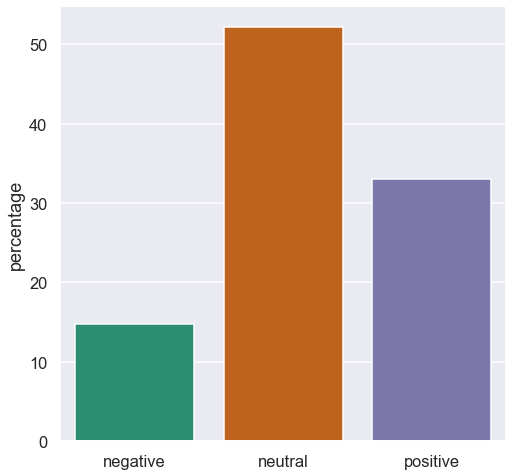

In [ ]:
fig, ax = plt.subplots(figsize = (8,8))
counts = df.label.value_counts(normalize = True)*100
sns.barplot(x=counts.index, y = counts, ax=ax)
ax.set_xticklabels(['negative', 'neutral', 'positive'])
ax.set_ylabel('percentage')
plt.show()

We need to break comments into meaningful words- to do this we need to import words organizer, expression organizer and import stop words to clean our dataset from all the stopwords since our dataset needs to be normalized we need to clean it from all the puntuation thats why we are using regular expression tokenizer 


In [ ]:
from nltk.tokenize import word_tokenize, RegexpTokenizer 
from nltk.corpus import stopwords 
tokenizer = RegexpTokenizer(r'\w+')

In [ ]:
# We also need to remove all the stopwords from the dataset bcz they dont add any value to the dataset
stop_words = stopwords.words('english')
# create process func to trace through comments and perform tokenizing lower case in stopword removal

def process_text(Posts_Title):
    tokens = []
    for line in df.Posts_Title:
        toks = tokenizer.tokenize(line)
        toks = [t.lower() for t in toks if t.lower() not in stop_words]
        tokens.extend(toks)
    return tokens    
        

frequency of words and positive comments labelled by 1 and we can preprocess these comments using the process function that we have created before 

In [ ]:
pos_lines = list(df[df.label == 1])
pos_tokens = process_text(pos_lines)
pos_freq = nltk.FreqDist(pos_tokens)
pos_freq.most_common(20)

[('mcu', 93),
 ('soldier', 90),
 ('winter', 88),
 ('falcon', 87),
 ('shang', 83),
 ('chi', 82),
 ('marvel', 69),
 ('think', 64),
 ('captain', 59),
 ('man', 53),
 ('america', 48),
 ('would', 48),
 ('movie', 40),
 ('made', 37),
 ('like', 36),
 ('walker', 35),
 ('new', 33),
 ('john', 33),
 ('one', 31),
 ('first', 30)]

Text(0.5, 1.0, 'word frequency Distribution (positive)')

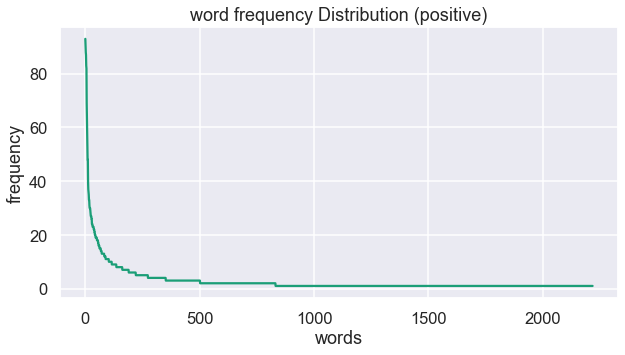

In [ ]:
# plotting freq distribution 
y_val = [x[1] for x in pos_freq.most_common()]
fig = plt.figure(figsize=(10,5))
plt.plot(y_val)

plt.xlabel('words')
plt.ylabel('frequency')
plt.title('word frequency Distribution (positive)')

<function matplotlib.pyplot.show(close=None, block=None)>

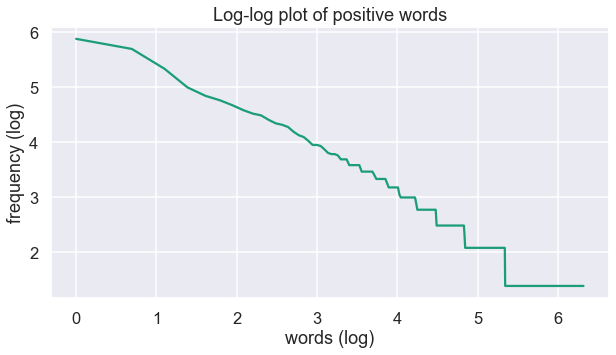

In [ ]:
# above plot shows power law disribution 
# log-log plot
y_final = []
for i, k, z, t in zip(y_val[0::4], y_val[1::4], y_val[2::4], y_val[3::4]):
    y_final.append(math.log(i+k+z+t))
x_val = [math.log(i + 1) for i in range(len(y_final))]

fig = plt.figure(figsize = (10, 5))

plt.xlabel('words (log)')
plt.ylabel('frequency (log)')
plt.title('Log-log plot of positive words')
plt.plot(x_val, y_final)
plt.show

the most frequent word will occur as twice as often as the second most freqent  word, 3 times as often as the third most freq word  etc...

# Data Understanding

In [ ]:
df.shape

(932, 6)

In [ ]:
df.describe()

,neg,neu,pos,compound,label
count,932.000000,932.000000,932.000000,932.000000,932.000000
mean,0.052995,0.844702,0.102306,0.092873,0.182403
std,0.119286,0.184973,0.154089,0.345840,0.672453
min,0.000000,0.192000,0.000000,-0.886000,-1.000000
25%,0.000000,0.719000,0.000000,0.000000,0.000000
50%,0.000000,0.919000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.189000,0.361200,1.000000
max,0.796000,1.000000,0.808000,0.973200,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 932 entries, 0 to 931
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   neg          932 non-null    float64
 1   neu          932 non-null    float64
 2   pos          932 non-null    float64
 3   compound     932 non-null    float64
 4   Posts_Title  932 non-null    object 
 5   label        932 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 43.8+ KB


### Dropping columns 
lets focus in the textual data and labels 

In [ ]:
new_df = df[['Posts_Title', 'label']].dropna()
new_df

,Posts_Title,label
0,Me as phony Dr. Strange 😅,-1
1,Hello there just wanted to share with everybod...,1
2,i was checking the script for the first Iron M...,-1
3,Far From Home Hydro man comic issue number ref...,0
4,Simu Liu Shares a First Look at New ‘Shang-Chi...,1
...,...,...
927,Simu Liu gonna kick us all,0
928,Its quite a bummer we havent seen Steve whield...,-1
929,Power couple,0
930,What could Falcon and Winter Soldier done diff...,-1


Here we have 3 categories or class 
- label = 0 ----> neutral class 
- label = 1 ----> positive class 
- label = -1 ----> negative class 

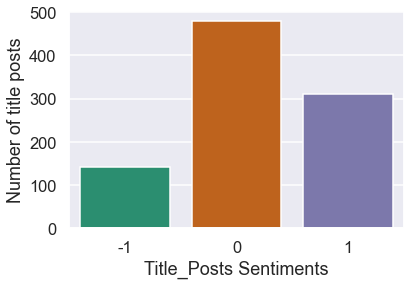

 0    480
 1    311
-1    141
Name: label, dtype: int64


In [ ]:
sns.countplot(
  x=new_df['label'],
  data=new_df.groupby('label').count()
)
plt.xlabel('Title_Posts Sentiments')
plt.ylabel('Number of title posts')
plt.show()
print(new_df.label.value_counts())

In [ ]:
##Score Analysis
pos_posts = new_df[new_df.label == 1]
neg_posts = new_df[new_df.label == -1]
neutral_posts = new_df[new_df.label == 0]
print(pos_posts.shape, neg_posts.shape, neutral_posts.shape)

(311, 2) (141, 2) (480, 2)


In [ ]:
new_df['label'] = new_df['label'].replace([0,-1], -1)
new_df['label'] = new_df['label'].replace([1], 1)
new_df.head()

,Posts_Title,label
0,Me as phony Dr. Strange 😅,-1
1,Hello there just wanted to share with everybod...,1
2,i was checking the script for the first Iron M...,-1
3,Far From Home Hydro man comic issue number ref...,-1
4,Simu Liu Shares a First Look at New ‘Shang-Chi...,1


# Word Cloud 

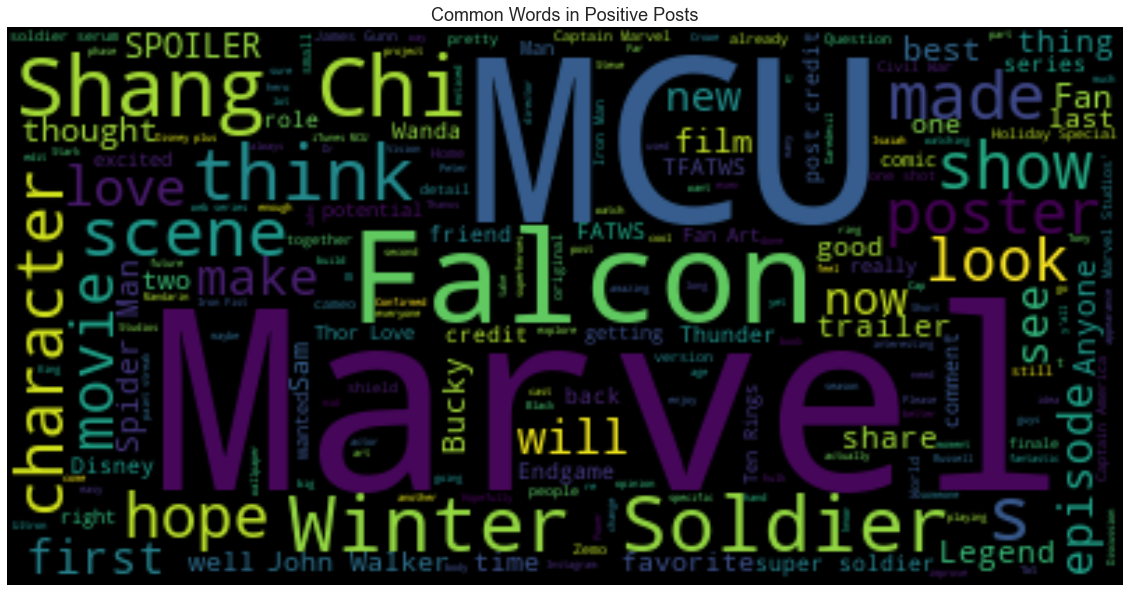

In [ ]:
## Removal of Stopwords
import nltk
import gensim
from gensim import corpora
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

pos_posts_text = " ".join(pos_posts.Posts_Title.to_numpy().tolist())
neg_posts_text = " ".join(neg_posts.Posts_Title.to_numpy().tolist())
neutral_posts = " ".join(neutral_posts.Posts_Title.to_numpy().tolist())

pos_posts_cloud = WordCloud(stopwords=STOPWORDS, background_color="black").generate(pos_posts_text)
neg_posts_cloud = WordCloud(stopwords=STOPWORDS, background_color="white").generate(neg_posts_text)
neutral_posts_cloud = WordCloud(stopwords=STOPWORDS, background_color="white").generate(neutral_posts)

def show_word_cloud(cloud, title):
  plt.figure(figsize = (20, 20))
  plt.imshow(cloud, interpolation='bilinear')
  plt.title(title)
  plt.axis("off")
  plt.show();

show_word_cloud(pos_posts_cloud, "Common Words in Positive Posts")

# Text Normalizations 

### 1. Convert text to lowercase 

In [ ]:
new_df.loc[:, 'Posts_Title'] = new_df['Posts_Title'].str.lower()
new_df['Posts_Title'].head(4)

0                            me as phony dr. strange 😅
1    hello there just wanted to share with everybod...
2    i was checking the script for the first iron m...
3    far from home hydro man comic issue number ref...
Name: Posts_Title, dtype: object

### 2. Tokenization 

In [ ]:
import nltk
import string
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer

def lemma_tokenizer(corpus):   
    corpus = ''.join([ch for ch in corpus if ch not in string.punctuation])  
    tokens = nltk.word_tokenize(corpus)
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(token) for token in tokens]

nltk_stopwords = nltk.corpus.stopwords.words('english')
print(nltk_stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
text_all = new_df.Posts_Title
y = new_df.label

# Split data for holdout test
from sklearn.model_selection import train_test_split
text_train, text_test, y_train, y_test = train_test_split(text_all, y, test_size=0.2, random_state=1)

# Compute term-document (tf) matrix with lemmatization
tf = CountVectorizer(tokenizer=lemma_tokenizer,  # use lemma_tokenizer
                     stop_words=nltk_stopwords,  # use customized stopwords list
                     ngram_range=(1,2))          # use unigrams and bigrams
tf_train = tf.fit_transform(text_train)
tf_test = tf.transform(text_test)

In [ ]:
# Apply trandorm to both train, test dataset 

In [ ]:
tf_train = tf.fit_transform(text_train)
tf_test = tf.transform(text_test)
tf_all = tf.fit_transform(text_all)


from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(tokenizer=lemma_tokenizer,  # use lemma_tokenizer
                        stop_words=nltk_stopwords,  # use customized stopwords list
                        ngram_range=(1,2))          # use unigrams and bigrams
tfidf_train = tfidf.fit_transform(text_train)
tfidf_test = tfidf.transform(text_test)
tfidf_all = tfidf.fit_transform(text_all)


C:\Users\kaur2\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['arent', 'couldnt', 'didnt', 'doe', 'doesnt', 'dont', 'ha', 'hadnt', 'hasnt', 'havent', 'isnt', 'mightnt', 'mustnt', 'neednt', 'shant', 'shes', 'shouldnt', 'shouldve', 'thatll', 'wa', 'wasnt', 'werent', 'wont', 'wouldnt', 'youd', 'youll', 'youre', 'youve'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


### Simple train-test spilt without cross-validation 

In [ ]:

#---Naive Bayes-------

# Model Building and Evaluation 
from sklearn.naive_bayes import MultinomialNB
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Generation Using Multinomial Naive Bayes
model_1 = MultinomialNB().fit(tfidf_train, y_train)
predicted_nb= model_1.predict(tfidf_test)
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted_nb))

from sklearn.metrics import classification_report
print(classification_report(y_test,predicted_nb))

# -------SVM---------- 

#importing SVC module from SVM classifier
from sklearn.svm import LinearSVC


# Training
model2 = LinearSVC(max_iter=10000)
model2.fit(tfidf_train, y_train)
y_pred_svc = model2.predict(tfidf_test)

# Evaluation
print("\nSVC Accuracy:",metrics.accuracy_score(y_test, y_pred_svc))
print(classification_report(y_test,y_pred_svc))

#----Logistic Regression------- 
from sklearn.linear_model import LogisticRegression
model_3 = LogisticRegression(max_iter=10000)
model_3.fit(tfidf_train, y_train)
y_pred_lr = model_3.predict(tfidf_test)

# Evaluation
print("\nLogistic Regression Accuracy:",metrics.accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test,y_pred_lr))

#----Decision Tree ------- 
from sklearn.tree import DecisionTreeClassifier
model_4 = DecisionTreeClassifier()
model_4.fit(tfidf_train, y_train)
y_pred_dt = model_4.predict(tfidf_test)

# Evaluation
print("\nDecision Trre  Accuracy:",metrics.accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test,y_pred_dt))

MultinomialNB Accuracy: 0.7112299465240641
              precision    recall  f1-score   support

          -1       0.70      1.00      0.82       126
           1       1.00      0.11      0.21        61

    accuracy                           0.71       187
   macro avg       0.85      0.56      0.51       187
weighted avg       0.80      0.71      0.62       187


SVC Accuracy: 0.7647058823529411
              precision    recall  f1-score   support

          -1       0.77      0.92      0.84       126
           1       0.73      0.44      0.55        61

    accuracy                           0.76       187
   macro avg       0.75      0.68      0.70       187
weighted avg       0.76      0.76      0.75       187


Logistic Regression Accuracy: 0.7005347593582888
              precision    recall  f1-score   support

          -1       0.70      0.97      0.81       126
           1       0.69      0.15      0.24        61

    accuracy                           0.70       187
 

### 10 fold- cross validation split 

In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
# Method to perform holdout test
def holdout_test(model, X_train, y_train, X_test, y_test, title):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(title, '\nAccuracy:', metrics.accuracy_score(y_test, y_pred))
    cm = pd.DataFrame(confusion_matrix(y_test, y_pred, labels=[1, 0]),
                      index=['actual 1', 'actual 0'],
                      columns=['predicted 1', 'predicted 0'])
    print('Confusion matrix:\n', cm)
    TP = cm.at['actual 1', 'predicted 1']
    FP = cm.at['actual 0', 'predicted 1']
    FN = cm.at['actual 1', 'predicted 0']
    print('precision =', TP/(TP+FP), ', recall =', TP/(TP+FN), ', F1-score =', 2*TP/(2*TP+FP+FN))

    # Method to perform cross-validation test without using using cross_val_score
from sklearn.model_selection import StratifiedKFold
kf = StratifiedKFold(n_splits=10, random_state=None, shuffle=False)

def cv_test(model, X_sparse, y, title):  # X_sparse is a scipy.sparse.csr_matrix (tf or tfidf matrix)
    num_total_tested = 0
    num_correctly_classified = 0   # to calculate average accuracy over k test sets
    cm_sum = np.zeros((2,2)) # initialize a 2x2 confusion matrix (cm) for summing up the cm's from all folds
    for train_index, test_index in kf.split(X_sparse, y):
        X_train, X_test = tf_all[train_index], tf_all[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        # print('X_train.shape:', X_train.shape, '\ny_train.index:', y_train.index)
        # print('X_test.shape:', X_test.shape, '\ny_test.index:', y_test.index)
        # print('X_train:\n', X_train, '\ny_train\n', y_train)
        # print('X_test:\n', X_test, '\ny_test\n', y_test)
        model.fit(X_train, y_train)
        num_total_tested += len(y_test)   # num_total_tested = num_total_tested + len(y_test)
        num_correctly_classified += metrics.accuracy_score(y_test, model.predict(X_test), normalize=False)
        # print(num_total_tested, num_correctly_classified)
        cm = pd.DataFrame(confusion_matrix(y_test, model.predict(X_test), labels=[1, 0]), 
                          index=['actual 1', 'actual 0'], 
                          columns=['predicted 1', 'predicted 0'])
        # print(cm)
        cm_sum += cm

    print(title, '\nAverage accuracy:', num_correctly_classified/num_total_tested)
    print('Confusion matrix:\n', cm_sum)
    print("'1' is the positive class")
    TP = cm_sum.at['actual 1','predicted 1']
    FP = cm_sum.at['actual 0','predicted 1']
    FN = cm_sum.at['actual 1','predicted 0']
    print('precision =', TP/(TP+FP), ',  recall =', TP/(TP+FN), ',  F1-score =', 2*TP/(2*TP+FP+FN))

In [ ]:

from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
holdout_test(mnb, tf_train, y_train, tf_test, y_test, 'Naive Bayes holdout test with tf matrix:')
holdout_test(mnb, tfidf_train, y_train, tfidf_test, y_test, '\nNaive Bayes holdout test with tfidf matrix:')
cv_test(mnb, tf_all, y, '\nNaive Bayes cv test with tf matrix:')
cv_test(mnb, tfidf_all, y, '\nNaive Bayes cv test with tfidf matrix:')

Naive Bayes holdout test with tf matrix: 
Accuracy: 0.732620320855615
Confusion matrix:
           predicted 1  predicted 0
actual 1           24            0
actual 0            0            0
precision = 1.0 , recall = 1.0 , F1-score = 1.0

Naive Bayes holdout test with tfidf matrix: 
Accuracy: 0.7112299465240641
Confusion matrix:
           predicted 1  predicted 0
actual 1            7            0
actual 0            0            0
precision = 1.0 , recall = 1.0 , F1-score = 1.0

Naive Bayes cv test with tf matrix: 
Average accuracy: 0.7424892703862661
Confusion matrix:
           predicted 1  predicted 0
actual 1        204.0          0.0
actual 0          0.0          0.0
'1' is the positive class
precision = 1.0 ,  recall = 1.0 ,  F1-score = 1.0

Naive Bayes cv test with tfidf matrix: 
Average accuracy: 0.7424892703862661
Confusion matrix:
           predicted 1  predicted 0
actual 1        204.0          0.0
actual 0          0.0          0.0
'1' is the positive class
precisio

In [ ]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression(random_state=1)
holdout_test(logit, tf_train, y_train, tf_test, y_test, 'Logistic regression holdout test with tf matrix:')
holdout_test(logit, tfidf_train, y_train, tfidf_test, y_test, '\nLogistic reg holdout test with tfidf matrix:')
cv_test(logit, tf_all, y, '\nLogistic regression cv test with tf matrix:')
cv_test(logit, tfidf_all, y, '\nLogistic regression cv test with tfidf matrix:')

Logistic regression holdout test with tf matrix: 
Accuracy: 0.7433155080213903
Confusion matrix:
           predicted 1  predicted 0
actual 1           21            0
actual 0            0            0
precision = 1.0 , recall = 1.0 , F1-score = 1.0

Logistic reg holdout test with tfidf matrix: 
Accuracy: 0.7005347593582888
Confusion matrix:
           predicted 1  predicted 0
actual 1            9            0
actual 0            0            0
precision = 1.0 , recall = 1.0 , F1-score = 1.0

Logistic regression cv test with tf matrix: 
Average accuracy: 0.7886266094420601
Confusion matrix:
           predicted 1  predicted 0
actual 1        136.0          0.0
actual 0          0.0          0.0
'1' is the positive class
precision = 1.0 ,  recall = 1.0 ,  F1-score = 1.0

Logistic regression cv test with tfidf matrix: 
Average accuracy: 0.7886266094420601
Confusion matrix:
           predicted 1  predicted 0
actual 1        136.0          0.0
actual 0          0.0          0.0
'1' is t

In [ ]:
from sklearn.svm import SVC
svc = SVC(kernel='linear')
holdout_test(svc, tf_train, y_train, tf_test, y_test, 'SVC holdout test with tf matrix:')
holdout_test(svc, tfidf_train, y_train, tfidf_test, y_test, '\nSVC holdout test with tfidf matrix:')
cv_test(svc, tf_all, y, '\nSVC cv test with tf matrix:')
cv_test(svc, tfidf_all, y, '\nSVC cv test with tfidf matrix:')

SVC holdout test with tf matrix: 
Accuracy: 0.7754010695187166
Confusion matrix:
           predicted 1  predicted 0
actual 1           27            0
actual 0            0            0
precision = 1.0 , recall = 1.0 , F1-score = 1.0

SVC holdout test with tfidf matrix: 
Accuracy: 0.7593582887700535
Confusion matrix:
           predicted 1  predicted 0
actual 1           25            0
actual 0            0            0
precision = 1.0 , recall = 1.0 , F1-score = 1.0

SVC cv test with tf matrix: 
Average accuracy: 0.796137339055794
Confusion matrix:
           predicted 1  predicted 0
actual 1        159.0          0.0
actual 0          0.0          0.0
'1' is the positive class
precision = 1.0 ,  recall = 1.0 ,  F1-score = 1.0

SVC cv test with tfidf matrix: 
Average accuracy: 0.796137339055794
Confusion matrix:
           predicted 1  predicted 0
actual 1        159.0          0.0
actual 0          0.0          0.0
'1' is the positive class
precision = 1.0 ,  recall = 1.0 ,  F1-sco

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=1)
holdout_test(tree, tf_train, y_train, tf_test, y_test, 'Decision tree holdout test with tf matrix:')
holdout_test(tree, tfidf_train, y_train, tfidf_test, y_test, '\nDecision tree holdout test with tfidf matrix:')
cv_test(tree, tf_all, y, '\nDecision tree cv test with tf matrix:')
cv_test(tree, tfidf_all, y, '\nDecision tree cv test with tfidf matrix:')

Decision tree holdout test with tf matrix: 
Accuracy: 0.8128342245989305
Confusion matrix:
           predicted 1  predicted 0
actual 1           32            0
actual 0            0            0
precision = 1.0 , recall = 1.0 , F1-score = 1.0

Decision tree holdout test with tfidf matrix: 
Accuracy: 0.7540106951871658
Confusion matrix:
           predicted 1  predicted 0
actual 1           34            0
actual 0            0            0
precision = 1.0 , recall = 1.0 , F1-score = 1.0

Decision tree cv test with tf matrix: 
Average accuracy: 0.8165236051502146
Confusion matrix:
           predicted 1  predicted 0
actual 1        205.0          0.0
actual 0          0.0          0.0
'1' is the positive class
precision = 1.0 ,  recall = 1.0 ,  F1-score = 1.0

Decision tree cv test with tfidf matrix: 
Average accuracy: 0.8165236051502146
Confusion matrix:
           predicted 1  predicted 0
actual 1        205.0          0.0
actual 0          0.0          0.0
'1' is the positive class